# True Normal Human Body Temperature

In this exploratory data analysis I will try to uncover wether the beleive normal body temperature is in fact what is currently beleive to be. The mean normal body temperature was held to be 37 ∘ C or 98.6 ∘ F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically speaking correct?

#### Needed modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats
import math
from scipy import stats

# For qqplot
import statsmodels.api as sm
from scipy.stats.mstats import zscore

C:\Users\Alfredo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 1. Inspecting the sample data:

In [2]:
df = pd.read_csv('human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

---

### 2. Validating sample data normality in three different ways:

We have a fairly large sample of 130 counts which is greater then most require(n>30). Also, the data is consider to be random and independent.


To have a stronger sence of normality in this data, I will be using three different methods; Chi-square goodness-of-fit test, a histogram, and a quantile-quantile plot.

#### Chi-square goodness-of-fit tests:

Chi-square statistic gives us an idea of the chances of getting this statistic value coming from the sample just by random chance alone. 

**Null hypothesis:** Sample data is coming from a normal distribution

**Alternative hypothesis:** Sample data is not coming from a normal distribution


If the value is above a certain threshold(usually 0.05), we will assume that we have a normal sample data distribution

In [5]:
temp = df['temperature']
stats.normaltest(temp)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Base on this test, we can assume that this data is coming from a normal distribution since the resulting p-value of .258 is much above our threshold value of .05.

#### Histogram distribution:

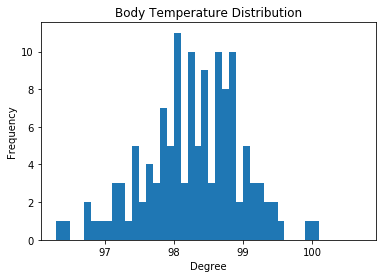

In [6]:
temp_val = df.temperature.sort_values()
bin_val = np.arange(start=temp.min(), stop=temp.max(), step= .1)
plt.hist(temp_val, bin_val)
plt.xlabel('Degree');
plt.ylabel('Frequency')
plt. title('Body Temperature Distribution')
plt.show()

Histogram shows as a fairly normal distribution.

#### Standard Quantile-Quantile plots

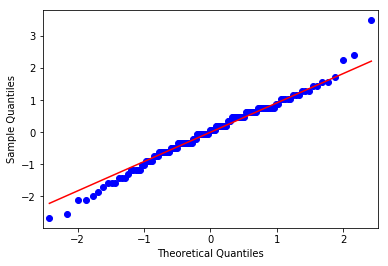

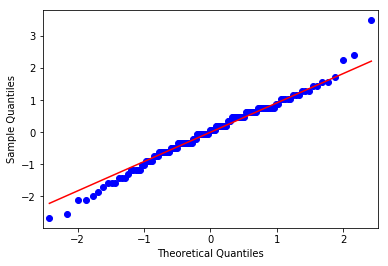

In [7]:
zscores = zscore(temp)
sm.qqplot(zscores, line='q')

#### Conclusion:

- Based on the chi-square test the sample distribution of our data is a good representation of the population.
- Also, the histogram and quantile-quantile plot shows a normal distribuion of the data.

---

### 3. Creating the statistical test:

Again, the objective of this test is to find whether there is statistical prove that the human body temperature is actually what is claimed to be.

#### Process:

- I will be comparing the sample human body temperature mean of 98.3 degrees against the currently known human body temperature of 98.6 degrees, using a one-sample test since we are not trying to compare from two different groups rather comparing our sample average temperature to the historical known body temperature.


- Eventhough my sample data is greater then 30, I do not have access to the population's human body temperature standard deviation so I will be passing on a z-test and rather perform a t-test using a sample stadard deviation and the rest of the needed variables.


- And lastly, I will be using a standard significance level of 0.05 to whether reject or fail to reject my null hypothesis.

### T-Test

**Null Hypothesis:** The average human temperature is in fact 98.6

**Alternative Hypothesis:** The average human temperature is something different then 98.6

**Alpha:** 0.05

First, in order to find the probability that our sample mean value of 98.3 could have happened randomly by chance alone, I will find the t critical value as shown below:

$$t-statistic = \frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}}$$

In [8]:
sample_mean = df.temperature.mean()
sample_stdev = df.temperature.std()
sample_size = len(df.temperature)
dg_freedom = sample_size - 1

t_value = (sample_mean - 98.6) / (sample_stdev/math.sqrt(sample_size))
t_value

-5.454823292364079

t-distributions are symmetric and t-tables are based on positive values, therefore we use the t-value on the right tale of the distribution which is exactly the same, but positive (5.454823292364079).

Also, the basis of the t-value is that the average human body temperature from our sample is -5.454823292364079 and 5.454823292364079 standard errors below and above what we expected to be(an average of 98.6) if the null hypothesis is true.

With this value on hand, we can now refer to the below t-table to find the probability of our sample mean of 98.3 happening randomly by chance alone, assuming that the true average human body temperature is 98.6.

**To do this:**
1. We use the infinity symbol since our degrees of freedom of 129 are not represented
2. Then follow the row to 3.291 value since this is the closest value represented to 5.454823292364079
3. And, finally from 3.291 follow upwards to the two-tail probability value(p-value) of .001

<img src="https://www2.palomar.edu/users/rmorrissette/Lectures/Stats/ttests/TTable.jpg" width="400" />

**p-value:**  .001 or (.1%)

This whole process could also be simplify and the t-statistic value and p-value can more rapidly be obtain by using the below scipy, one some t-test module:

In [9]:
scipy.stats.ttest_1samp(temp, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

If we look at the p-value using this module, we get a more accurate results as it shows how 0.00000024106320415561276 or .000024% is the precise probability of my sample average human body temperature happening by random chance alone.

**Conclusion:** 

- Looking at my obtained p-value of .000024% and significance level of 5%, we can now conclude that there is high evidence to reject the null hypothesis in favor for the alternative.

- The chances that we obtained an average human body temperature of 98.3 do to chance alone is .000024%, which is extremly lower then our significance level. Making us beleive that the beleived human body temperature of 98.6 is not in fact the true population human body average temperature.

### Further information:

- If the population standard deviation is present, it is prefered to use a z-test:
$$Z-test = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

This will result in a more accurate validated test. Since we will not have the need to estimate the population standard deviation with the sample standard deviation.

In [10]:
sample_mean = df.temperature.mean()
sample_stdev = df.temperature.std()
sample_size = len(df.temperature)

# instead of using a sample_stdev, you would use the real population standard deviation
z_score = ((sample_mean - 98.6)/(sample_stdev/np.sqrt(sample_size)))

print('z_score:', z_score)

z_score: -5.45482329236


<img src="http://www.z-table.com/uploads/2/1/7/9/21795380/9340559_orig.png" width="400" />

our p-value can be found by indexing to our z-score through the first column down, then getting the hundred decimal point shown in the first row and taking the p-value where these two cross paths.

However this can be much faster using a software function like that one below:

In [11]:
from scipy import stats

p_value = scipy.stats.norm.sf(abs(z_score))*2
print('p_value:', p_value)

p_value: 4.90215701411e-08


---

### Let's now find out at what temperature should we consider someone's temperature to be "abnormal!

For this, we are basically determining that for everytime we take a sample of the population we can have a 95% confidence that the true normal human body temperature will be within certain range. So we need to find these ranges (confidence intervals).

#### Confidence Intervals:

In [12]:
# Estimated standard deviation from the mean
t_critical = round(scipy.stats.t.ppf(1-0.025, 999), 2)
print("t-critical value:", t_critical)  

t-critical value: 1.96


- This t-critical value can also be manually found under the above t-table following the one-tail(.025) or two-tail(.05) rows and infinity degrees of freedom

In [13]:
sample_mean = df.temperature.mean()
sample_stdev = df.temperature.std()
sample_size = len(df.temperature)

# Estimate of true standard deviation for t-test
sigma = sample_stdev/math.sqrt(sample_size)
margin_of_error = t_critical * sigma

# Confidence Intervals
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("Sample mean: ", sample_mean)
print("Sample stdev: ", sample_stdev)
print("Sample size: ", sample_size)
print("t-critical value: ", t_critical)
print("Margin or error: ", margin_of_error)
print("Confidence interval at 95% :", "Lower bound:", lower_bound, "Upper bound:", upper_bound)

Sample mean:  98.24923076923078
Sample stdev:  0.7331831580389454
Sample size:  130
t-critical value:  1.96
Margin or error:  0.126036657002
Confidence interval at 95% : Lower bound: 98.1231941122 Upper bound: 98.3752674262


Also, instead of doing this manually; finding confidence intervals can be found in an easier manner by using scipy stat interval module as shown below:

In [14]:
scipy.stats.t.interval(alpha = 0.95,        # Confidence level
                 df= 129,                   # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(98.122002905608042, 98.376458632853513)

**Conclusion:** 

- Any temperature above or below these threshold values (98.1 - 98.4) should be further investigated, and could potentially be consider as abnormal temperatures.

- We have a 95% confidence that my random sample mean of 98.25 is within .13 of the true sampling distribution mean(population mean). In other words, we can say that there is a 95% chance that the true population mean is within .13 of our sample mean.

### Let's now find out if there is a significant difference between males and females in normal temperature!

Since now we are trying to compare whether the averages of two groups have a significant differences between them (males and females), I will be using an independent two sample t-test.

**Null hypothesis:** Males normal temperature = Females normal temperature

**Alternitive hypothesis:** Males normal temperature $\neq$ Female normal temperature

**Assuming a significance level of:** .05

Let's first split the data into genders:

In [15]:
male_s = df[df['gender'] == 'M']
female_s = df[df['gender'] == 'F']

In [16]:
male_s.head(2)

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0


In [17]:
female_s.head(2)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0


---

Inspecting basic data information:

In [18]:
male_s.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [19]:
female_s.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


---

obtaining temperature column:

In [20]:
#Getting temperatures for each group
m_temp = male_s.temperature
f_temp = female_s.temperature

We can manually obtain the t-statistic value as shown below:

In [21]:
# calculate means for groups' temperatures
m_mean, f_mean = np.mean(m_temp), np.mean(f_temp)

# difference in means
dif_mean = f_mean - m_mean

# Groups' sizes
m_samplesize = len(m_temp)
f_samplesize = len(f_temp)

# sample standard deviations with 1 degree of freedom 
m_std, f_std = np.std(m_temp, ddof=1), np.std(f_temp, ddof=1)

# sample standard error
sed = np.sqrt((m_temp.std()**2/m_samplesize) + (f_temp.std()**2/f_samplesize))

# calculate the t statistic
t_stat = dif_mean / sed

print('males mean:%.3f, females mean:%.3f' % (m_mean, f_mean)) 
print('males std:%.3f, females mean:%.3f' % (m_std, f_std))
print("means' difference:%.3f" % dif_mean)
print('males samplesize:%.3f, females samplesize:%.3f' % (m_samplesize, f_samplesize))
print('t_statistic:%.3f' % t_stat)

males mean:98.105, females mean:98.394
males std:0.699, females mean:0.743
means' difference:0.289
males samplesize:65.000, females samplesize:65.000
t_statistic:2.285


With the t-value on hand, we can find the the corresponding p-value for our test. Looking at our t-table above, using 60 as the closest degrees of freedom and closest t-statistic value of 2.39 we get a p-value of .02 for a two-tail distribution.

This process is much faster and less likely to errors if we use the ttest_ind() function from the scipy library as shown below:

In [22]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(m_temp, f_temp)
print('t=%.3f, p=%.3f' % (stat, p))

t=-2.285, p=0.024


Assuming that there is no real difference between the males and females normal body temperature, the chances of obtaining a mean difference between these groups just by random chance alone is .024, which is very low and lower then our significance set level of .05. Therefor we will reject the null hypothesis and conclude that **there is significance between males and females normal body temperatures.**

### Conclusion:

After analyzing this data, there are a couple of interesting insights and are describe as follow:

- First, in regards of the average human body temperature being 98.6, the inferencial analysis shows that this is not the case. Looking at the sample data, we abtained a average human body temperature of  98.3, and a low probability that this could happened just due to chance alone. However, the difference between these two values is only .3 and needs to be decide whether this difference is of significance value or not. Furthermore, there has been a lot of research with different conclusions to what the true average human body temperature might be.


- Also, the normal human body temperature range should be between 98.12 and 98.38 F degrees, and anything outside of this range should be consider abnormal.


- And lastly, our test shows that there is a significant difference between males and females human body temperature.

---
Alfredo M. ☺️